In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint

# if you get a ffmpeg error when creating movies try `conda install -c conda-forge ffmpeg` and restart Anaconda

# Computational Mathematics  <a class="tocSkip">

## Linear Algebra 2  <a class="tocSkip">
    
### (more linear algebra and some of its applications)  <a class="tocSkip">

## Learning outcomes  <a class="tocSkip">
    
    
1. To further our understanding of linear algebra from a geometrical perspective.


2. To extend the previous lecture's discussion to the topic of eigenvalues and eigenvectors.


3. To appreciate the existence and uniqueness of eigenvalues/vectors, more on bases, and matrix diagonalisation, as well as the SVD.


4. To give you some exposure to how these ideas can be used to analyse and solve systems of ODEs [in the supplementary notebook].

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introductory-comments" data-toc-modified-id="Introductory-comments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introductory comments</a></span></li><li><span><a href="#Geometric-interpretation-of-linear-transformations-(continued)" data-toc-modified-id="Geometric-interpretation-of-linear-transformations-(continued)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Geometric interpretation of linear transformations (continued)</a></span><ul class="toc-item"><li><span><a href="#Writing-a-fixed-location-in-terms-of-a-new-basis" data-toc-modified-id="Writing-a-fixed-location-in-terms-of-a-new-basis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Writing a fixed location in terms of a new basis</a></span></li><li><span><a href="#Writing-a-transformation-in-terms-of-a-new-basis-[*]" data-toc-modified-id="Writing-a-transformation-in-terms-of-a-new-basis-[*]-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Writing a transformation in terms of a new basis [*]</a></span><ul class="toc-item"><li><span><a href="#Some-fairly-complicated-examples-[**]" data-toc-modified-id="Some-fairly-complicated-examples-[**]-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Some fairly complicated examples [**]</a></span></li></ul></li><li><span><a href="#Transformation-of-a-unit-sphere" data-toc-modified-id="Transformation-of-a-unit-sphere-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transformation of a unit sphere</a></span></li><li><span><a href="#A-symmetric-positive-definite-case" data-toc-modified-id="A-symmetric-positive-definite-case-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>A symmetric positive definite case</a></span></li></ul></li><li><span><a href="#Eigenvalues-and-eigenvectors" data-toc-modified-id="Eigenvalues-and-eigenvectors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Eigenvalues and eigenvectors</a></span><ul class="toc-item"><li><span><a href="#How-to-find-eigenvalues-and-eigenvectors" data-toc-modified-id="How-to-find-eigenvalues-and-eigenvectors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How to find eigenvalues and eigenvectors</a></span></li></ul></li><li><span><a href="#The-determinant-again,-and-its-use-in-finding-eigenvalues" data-toc-modified-id="The-determinant-again,-and-its-use-in-finding-eigenvalues-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The determinant again, and its use in finding eigenvalues</a></span><ul class="toc-item"><li><span><a href="#An-example-eigenvalue-problem" data-toc-modified-id="An-example-eigenvalue-problem-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>An example eigenvalue problem</a></span></li><li><span><a href="#What-does-linear-(in)dependence-mean?" data-toc-modified-id="What-does-linear-(in)dependence-mean?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>What does linear (in)dependence mean?</a></span></li><li><span><a href="#Repeated-eigenvalues---algebraic-&amp;-geometric-multiplicity" data-toc-modified-id="Repeated-eigenvalues---algebraic-&amp;-geometric-multiplicity-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Repeated eigenvalues - algebraic &amp; geometric multiplicity</a></span></li><li><span><a href="#Some-useful-theoretical-results-about-eigenvalues/vectors" data-toc-modified-id="Some-useful-theoretical-results-about-eigenvalues/vectors-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Some useful theoretical results about eigenvalues/vectors</a></span></li><li><span><a href="#Symmetric-Positive-Definite-(SPD)-matrices-[*]" data-toc-modified-id="Symmetric-Positive-Definite-(SPD)-matrices-[*]-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Symmetric Positive-Definite (SPD) matrices [*]</a></span><ul class="toc-item"><li><span><a href="#Diagonal-dominance" data-toc-modified-id="Diagonal-dominance-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Diagonal dominance</a></span></li></ul></li></ul></li><li><span><a href="#Matrix-diagonalisation" data-toc-modified-id="Matrix-diagonalisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Matrix diagonalisation</a></span><ul class="toc-item"><li><span><a href="#Symmetric-real-matrices" data-toc-modified-id="Symmetric-real-matrices-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Symmetric real matrices</a></span></li><li><span><a href="#When-is-a-matrix-diagonalisable" data-toc-modified-id="When-is-a-matrix-diagonalisable-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>When is a matrix diagonalisable</a></span></li><li><span><a href="#The-details" data-toc-modified-id="The-details-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>The details</a></span></li><li><span><a href="#An-example" data-toc-modified-id="An-example-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#A-geometrical-interpretation-of-matrix-multiplication-using-matrix-diagonalisation" data-toc-modified-id="A-geometrical-interpretation-of-matrix-multiplication-using-matrix-diagonalisation-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>A geometrical interpretation of matrix multiplication using matrix diagonalisation</a></span></li></ul></li><li><span><a href="#Some-applications-of-eigen-values/vectors" data-toc-modified-id="Some-applications-of-eigen-values/vectors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Some applications of eigen-values/vectors</a></span><ul class="toc-item"><li><span><a href="#Linear-systems-[*]" data-toc-modified-id="Linear-systems-[*]-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Linear systems [*]</a></span><ul class="toc-item"><li><span><a href="#Re-interpretation-in-terms-of-eigenvalues-and-eigenvectors" data-toc-modified-id="Re-interpretation-in-terms-of-eigenvalues-and-eigenvectors-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Re-interpretation in terms of eigenvalues and eigenvectors</a></span></li></ul></li><li><span><a href="#Powers-of-matrices-[*---but-note-we-are-going-to-use-this-result-in-the-next-section]" data-toc-modified-id="Powers-of-matrices-[*---but-note-we-are-going-to-use-this-result-in-the-next-section]-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Powers of matrices [* - but note we are going to use this result in the next section]</a></span><ul class="toc-item"><li><span><a href="#Fibonacci-numbers-[*]" data-toc-modified-id="Fibonacci-numbers-[*]-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Fibonacci numbers [*]</a></span></li></ul></li><li><span><a href="#Solving-a-system-of-ODEs" data-toc-modified-id="Solving-a-system-of-ODEs-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Solving a system of ODEs</a></span><ul class="toc-item"><li><span><a href="#The-idea/theory" data-toc-modified-id="The-idea/theory-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>The idea/theory</a></span></li><li><span><a href="#An-example" data-toc-modified-id="An-example-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Making-use-of-matrix-diagonalisation-[*]" data-toc-modified-id="Making-use-of-matrix-diagonalisation-[*]-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Making use of matrix diagonalisation [*]</a></span></li></ul></li></ul></li><li><span><a href="#Singular-Value-Decomposition-(SVD)" data-toc-modified-id="Singular-Value-Decomposition-(SVD)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Singular Value Decomposition (SVD)</a></span><ul class="toc-item"><li><span><a href="#Some-SVD-properties" data-toc-modified-id="Some-SVD-properties-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Some SVD properties</a></span></li><li><span><a href="#Geometric-interpretation" data-toc-modified-id="Geometric-interpretation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Geometric interpretation</a></span></li><li><span><a href="#The-compact-form-of-SVD" data-toc-modified-id="The-compact-form-of-SVD-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>The compact form of SVD</a></span></li><li><span><a href="#Aside:-some-of-the-various-uses-of-the-SVD" data-toc-modified-id="Aside:-some-of-the-various-uses-of-the-SVD-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Aside: some of the various uses of the SVD</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introductory comments

Last lecture we emphasised that linear algebra is ubiquitous (i.e. occurs all over the place) in (computational) science & engineering.

In this lecture we will cover some further important topics related to linear algebra.

Assuming we don't run out of time, I will show you how to formulate and solve (analytically and numerically) physical problems which yields the following animations [this material is in the supplementary notebook].


NB. MSD = Mass Spring Damper

<br>

<video controls loop width="600" src="animations/MSD.mp4"/>


A more complex example with two coupled masses 

[NB. there is still damping in the physics here, I just haven't plotted the two dampers as they get in the way]

<br>

<video controls loop  width="600"  src="animations/MSD2.mp4"/>


A homework exercise asks you to solve the double pendulum problem

<video controls loop  width="400" src="animations/double_pendulum.mp4"/>


and then to take a look at the supplemental notebook that considers the triple pendulum.

<video controls loop  width="400" src="animations/triple_pendulum.mp4"/>

where we can slightly perturb initial conditions multiple times and plot all the trajectories simultaneously:

<br>

<video controls loop  width="400" src="animations/triple_pendulum_fancy.mp4"/>

# Geometric interpretation of linear transformations (continued)

Recall from the end of the last lecture where we established that:


1. if we are considering certain transformations of point(s) or space,  e.g. rotations, scaling, shear, we can describe this via multiplication by a certain matrix - we start from something physical/geometrical and look to interpret/use this in terms of a matrix.


2. on the flip-side, if we instead start with a matrix we can consider it in terms of its geometrical transformation properties.


We can extend this to consider how we might represent points in a different coordinate system (i.e. in terms of different basis vectors), and how we would describe a transformation in terms of a different coordinate system. 

Why might we want do to this? In both cases considering a different coordinate system may make things easier for us.

Let's consider some examples.

## Writing a fixed location in terms of a new basis

What we did previously was consider the transformation

$$\boldsymbol{p}\longrightarrow \boldsymbol{p}' = A\boldsymbol{p}$$

or

$$p_1 \boldsymbol{i} +  p_2\boldsymbol{j} \longrightarrow  p_1 (A\boldsymbol{i}) + p_2 (A\boldsymbol{j})$$

In the original coordinate system we moved the distance $p_1$ in direction $\boldsymbol{i}$ and $p_2$ in direction $\boldsymbol{j}$ (it doesn't matter in which order of course, we end up at the same position).

Now as we could interpet this transformation in terms of the coefficients being held constant, with only the basis vectors transformed by the matrix multiplication, it turned out that in the new coordinates (i.e. in terms of the new basis vectors) we moved the same multiples but of new basis vectors: $p_1$ multiplied by  $A \boldsymbol{i}$ and $p_2$ multiplied $A\boldsymbol{j}$. 

I used the word 'multiples' here rather than distance to emphasise that even if the original basis vectors were normalised, the new ones might not be - as $\boldsymbol{i}$ has unit length we can just talk about direction $\boldsymbol{i}$, as  $A \boldsymbol{i}$ may not have unit length we should be careful about talking about direction  $A \boldsymbol{i}$!

A consequence of this transformation is of course that the location of the point $\boldsymbol{p}$ changes along with the coordinates.

But for some applications this may not be what we wanted.

Often our point will be fixed in space and we will simply want to describe that same location using a different coordinate system. In this case we will clearly need to update the coefficients as well. 

We will want to find new coefficients or coordinates $p_1'$ and $p_2'$ such that the location of the point is unchanged. Mathematically this can be written as

$$p_1 \boldsymbol{i} +  p_2\boldsymbol{j} = p_1' (A\boldsymbol{i}) + p_2' (A\boldsymbol{j})$$

If I write this in terms of matrices, with the columns of the matrix representing the basis vectors, then this equivalence can be written as

$$I  \boldsymbol{p} = (AI) \boldsymbol{p}'$$

(where I have explicitly included the identity matrix on the LHS here since we used a simple form for the original basis vectors - the columns of the identity matrix are our $\boldsymbol{i}$ and $\boldsymbol{i}$ basis vectors.  This could be generalised to any starting basis vectors/matrix).

Remember I want to find $\boldsymbol{p}'$ such that the above equivalnce is true. 

Thinking about things in this matrix form tells us how we can do this - simply multiply both sides by the inverse of $(AI)$ (I leave this as $AI$ here rather than rewriting as $A$ just to emphasise that the $I$ is encoding the original basis; it can't be ignored if we started from something other that the $\boldsymbol{i}, \;\boldsymbol{j}$ basis):

$$ \boldsymbol{p}' = (AI)^{-1}  I  \boldsymbol{p} = I^{-1} A^{-1} I \boldsymbol{p}$$

this is of course for our case simply 

$$ \boldsymbol{p}' = A^{-1} \boldsymbol{p}$$

(but we'd need to include the analogue of the $I$ matrix if we had a more complicated starting basis)

Let's confirm this result visually

(-0.300000, 3.000000)

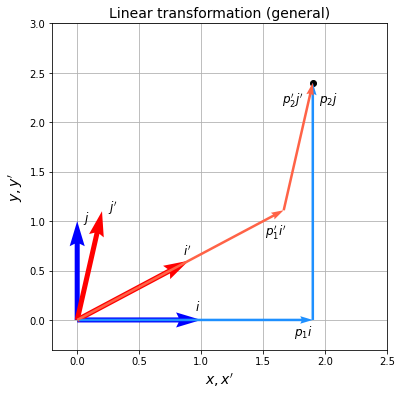

In [3]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (general)', fontsize=14)
ax1.grid(True)

# original basis vectors
i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)

# add some text
ax1.text(i[0]-0.05, i[1]+0.1, "$i$", fontsize=12)
ax1.text(j[0]+0.05,j[1], "$j$", fontsize=12)


# tranformation matrix
A = np.array([[0.9,0.2],[0.6,1.1]])


#  **** transformed basis vectors ****
i_ = A@i
j_ = A@j


# plot the transformed vectors
ax1.quiver(i_[0], i_[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10, width=0.015)
ax1.quiver(j_[0], j_[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10, width=0.015)

# add some text
ax1.text(i_[0]-0.05, i_[1]+0.05, "$i'$", fontsize=12)
ax1.text(j_[0]+0.05,j_[1], "$j'$", fontsize=12)

# add a point
p = 1.9*i + 2.4*j

# plot it
ax1.plot(p[0],p[1],'ko')

# plot components - the lighter blue vectors in the i and j directions
ax1.quiver(p[0]*i[0], p[0]*i[1], angles='xy', scale_units='xy', scale=1, color='dodgerblue', zorder=20)
ax1.quiver(p[0]*i[0], p[0]*i[1], p[1]*j[0], p[1]*j[1], angles='xy', scale_units='xy', scale=1, 
           color='dodgerblue', zorder=20)

# add some text
ax1.text(p[0]*i[0]-0.15, p[0]*i[1]-0.15, "$p_1 i$", fontsize=12)
ax1.text(p[0]*i[0]+p[1]*j[0]+0.05, p[0]*i[1]+p[1]*j[1]-0.2, "$p_2 j$", fontsize=12)


# **** define transformed coefficients by multiplying by A^{-1}: ****
p_ = sl.inv(A)@p


# plot components in the new coordinates (i_ and j_) in light red
ax1.quiver(p_[0]*i_[0], p_[0]*i_[1], angles='xy', scale_units='xy', scale=1, color='tomato', zorder=20)
ax1.quiver(p_[0]*i_[0], p_[0]*i_[1], p_[1]*j_[0], p_[1]*j_[1], angles='xy', scale_units='xy', scale=1, 
           color='tomato', zorder=20)

# add some text
ax1.text(p_[0]*i_[0]-0.15, p_[0]*i_[1]-0.25, "$p_1' i'$", fontsize=12)
ax1.text(p_[0]*i_[0]+p_[1]*j_[0]-0.25, p_[0]*i_[1]+p_[1]*j_[1]-0.2, "$p_2' j'$", fontsize=12)

ax1.set_xlim(-0.2,2.5)
ax1.set_ylim(-0.3,3)

The primed $\boldsymbol{i}$ and $\boldsymbol{j}$ vectors are our transformed basis, here given by the columns of the arbitrarily chosen transformtion matrix $A$. We clearly see if we move the appropriate multiples of these vectors, with the mutliples given by $\boldsymbol{p}'$, then we do indeed end up at our original starting $ \boldsymbol{p}$ location.


So we know how to write an unchanged (i.e. un-transformed) position in terms of different basis vectors.

<div class="optional">

## Writing a transformation in terms of a new basis [*]

Let's extend that to now think about how we would write a transformation in terms of a different basis.

For example, assume that we transform a point in the original basis using a transformation described by matrix multiplication (what we did at the end of the previous lecture - e.g. a shear or a rotation). 

How would we describe that same transformation in terms of a different basis?

Consider this example:  suppose we consider the transformation of a point where we reflect the position about the $y$ axis ($x\rightarrow -x$), and we stretch by a factor of 2 in the $y$ direction ($y\rightarrow 2y$). In terms of the simple basis vectors $\boldsymbol{i}$ and $\boldsymbol{j}$ aligned with the $x$ and $y$ directions, this can obviously be represented by the matrix

$$A=
\begin{pmatrix}
-1 & 0 \\
0 & 2
\end{pmatrix}
$$

Now let's pretend that we were using different basis vectors to describe our original location. Let's assume we wanted to update that location in the same manner as just described. 

In terms of the second set of basis vectors we wouldn't simply swap the sign of the first value and multiply the second value by 2, this would take us to the wrong location. So we need a different transformation matrix to above. What is this?

Well the answer is to compose transformation, equivalently to multiply matrices.

Note that the reason we may want to do this is exactly because in terms of a particular basis a transformation may be especially easy to write down, or to interpret.

In the example in the following cell the matrix $A$ defined just above transforms our point using the original basis:

if $\boldsymbol{p}$ is our original point in terms of the original simple basis vectors, then
$\boldsymbol{q}=A\boldsymbol{p}$ is our transformed point in terms of the same original vectors.
    
</div>

<div class="optional">

Now consider a new set of basis vectors obtained by pre-multiplication by a matrix, e.g.

$$A_b = 
\begin{pmatrix}
    0.9 & 0.2\\
    0.6 & 1.1
\end{pmatrix}
$$

Based on what we saw above, $A_b^{-1}\boldsymbol{p}$ gives the coordinates of the *original point* in terms of the new basis.

So starting from a point $\boldsymbol{p}$, 

$A\boldsymbol{p}$ transforms it in the original basis, 

and $A_b^{-1}A\boldsymbol{p}$ is then the *transformed point written in terms of the new basis vectors*.

Admittedly this is getting a bit complicated, let's plot all of this to confirm it's correct and maybe understand a bit better what is going on

Let 

- $\boldsymbol{p}\,$ denote the coordinates of the original point in terms of the first set of basis vectors


- $\boldsymbol{q}\,$ denote the coordinates of the transformed point in terms of the first set of basis vectors


- $\boldsymbol{p'}\,$ denote the coordinates of the original point in terms of the second set of basis vectors


- $\boldsymbol{q'}\,$ denote the coordinates of the transformed point in terms of the second set of basis vectors
    
</div>

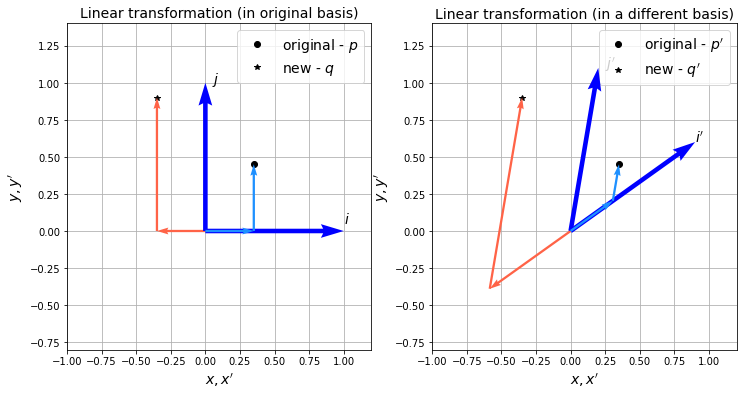

In [4]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (in original basis)', fontsize=14)
ax1.grid(True)

# original basis vectors
i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)

# add some text
ax1.text(i[0], i[1]+0.05, "$i$", fontsize=14)
ax1.text(j[0]+0.05,j[1], "$j$", fontsize=14)

# transformation matrix
A = np.array([[-1,0],[0,2]])

# add a point
p = 0.35*i + 0.45*j

# plot it
ax1.plot(p[0],p[1],'ko', label='original - $p$')

# plot components
ax1.quiver(p[0]*i[0], p[0]*i[1], angles='xy', scale_units='xy', scale=1, color='dodgerblue', zorder=20)
ax1.quiver(p[0]*i[0], p[0]*i[1], p[1]*j[0], p[1]*j[1], angles='xy', scale_units='xy', 
           scale=1, color='dodgerblue', zorder=20)

# transform the point
q = A@p

# plot it
ax1.plot(q[0],q[1],'k*', label='new - $q$')

# plot components
ax1.quiver(q[0]*i[0], q[0]*i[1], angles='xy', scale_units='xy', scale=1, color='tomato', zorder=5)
ax1.quiver(q[0]*i[0], q[0]*i[1], q[1]*j[0], q[1]*j[1], angles='xy', scale_units='xy', scale=1, color='tomato', zorder=5)

ax1.set_xlim(-1.0,1.2)
ax1.set_ylim(-0.8,1.4)

ax1.legend(loc='best', fontsize=14)
##################################
ax1 = fig.add_subplot(122)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (in a different basis)', fontsize=14)
ax1.grid(True)

# original basis vectors
i = np.array([1,0])
j = np.array([0,1])

# plot original point
ax1.plot(p[0],p[1],'ko', label="original - $p'$")

# tranformation matrix to obtain a new basis
Ab = np.array([[0.9,0.2],[0.6,1.1]])

# transformed basis vectors
i_ = Ab@i
j_ = Ab@j

# plot the vectors
ax1.quiver(i_[0], i_[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)
ax1.quiver(j_[0], j_[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)

# add some text
ax1.text(i_[0], i_[1], "$i'$", fontsize=14)
ax1.text(j_[0]+0.05,j_[1], "$j'$", fontsize=14)

# coordinates of original point in new basis
p_ = sl.inv(Ab)@p

# plot components to show that these give the same location in terms of i_ and j_
ax1.quiver(p_[0]*i_[0], p_[0]*i_[1], angles='xy', scale_units='xy', scale=1, color='dodgerblue', zorder=20)
ax1.quiver(p_[0]*i_[0], p_[0]*i_[1], p_[1]*j_[0], p_[1]*j_[1], angles='xy', scale_units='xy', 
           scale=1, color='dodgerblue', zorder=20)


# coordinates of point in terms of the transformation given by A, but in original basis
q = A@p

# plot it
ax1.plot(q[0],q[1],'k*', label="new - $q'$")

# now let's check that we can get to the same location using our second basis - how do I write q in terms i_, j_
q_ = sl.inv(Ab)@q

# plot components
ax1.quiver(q_[0]*i_[0], q_[0]*i_[1], angles='xy', scale_units='xy', scale=1, color='tomato', zorder=5)
ax1.quiver(q_[0]*i_[0], q_[0]*i_[1], q_[1]*j_[0], q_[1]*j_[1], angles='xy', scale_units='xy', 
           scale=1, color='tomato', zorder=5)

ax1.set_xlim(-1.0,1.2)
ax1.set_ylim(-0.8,1.4)

ax1.legend(loc='best', fontsize=14)

<div class="optional">

If we started with a point $\boldsymbol{p}'$ in the second coordinate system, but we could describe our transformation more easily in the first coordinate system (as in the example above), then we would do the following:


1. Starting from a point in the second coordinate system, pre-multiply by $A_b$ to map to coordinates in the first ($\boldsymbol{p}=A_b\boldsymbol{p}'$)


2. Now pre-multiply by $A$ to perform the transformation of the point written in terms of the first basis
($\boldsymbol{q}=A\boldsymbol{p}$)


3. Finally  pre-multiply by $A_b^{-1}$ to map these new coordinates back into the second coordinate system
($\boldsymbol{q}'=A_b^{-1}\boldsymbol{q}$)


Combining:

$$ \boldsymbol{q}' = A_b^{-1} \, A \, A_b\,  \boldsymbol{p'} $$

this combined matrix on the left $(A_b^{-1} \, A \, A_b)$ is what we would need to multiply through by to start with a  $\boldsymbol{p'}$ given by the black dot on the RHS image above, and jump straight to the black star in the image on the right, for example.


If our transformation was more convenient to write in terms of the second set of basis vectors then we would just go in the opposite direction - starting from a point  $\boldsymbol{p}$ in the original basis,  

$$ \boldsymbol{q} = A_b \, A \, A_b^{-1}\,  \boldsymbol{p}$$ 

would be the transformed point.

Note that the $A_b$ and $A_b^{-1}$ are interchangeable depending on which direction we interpret the transformation $A_b$ to be in.

We'll return to something analogous when we introduce **matrix diagonalisation** a little later!
    
</div>

<div class="advanced">

### Some fairly complicated examples [\**]

Let's now consider a scenario where we want to reflect a point across a line oriented 60 degrees from the $x$ axis.

Suppose we have a $\boldsymbol{p}$ written in terms of a first coordinate systems assumed to be $\boldsymbol{i}$, $\boldsymbol{j}$.

An easy way to achieve this transformation is to first rotate our coordinate system so that this line is oriented with the $y$ axis, we can do this by rotating *clockwise* by 30 degrees ($90-60$): we pre-multiply our vector by the inverse of

$$A_b = 
\begin{pmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{pmatrix},\qquad \text{with} \quad \theta = -30\frac{\pi}{180} \quad\text{[Remembering that positive angle corrsponds to an anti-clockwise rotation]}
$$

We then reflect about the $y$ axis (i.e. swap the sign of the $x$ component): we can do this through pre-multiplication by

$$A = 
\begin{pmatrix}
-1 & 0\\
0 & 1
\end{pmatrix}
$$

and finally we transform back to the original basis: we pre-multiply by $A_b$.

The new location can therefore be written as

$$\boldsymbol{q} = 
\begin{pmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{pmatrix}
\begin{pmatrix}
-1 & 0\\
0 & 1
\end{pmatrix}
\begin{pmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{pmatrix}^{-1}
\boldsymbol{p}
$$  

Let's plot this new point to check our above reasoning is correct.
    
</div>

(-0.200000, 1.200000)

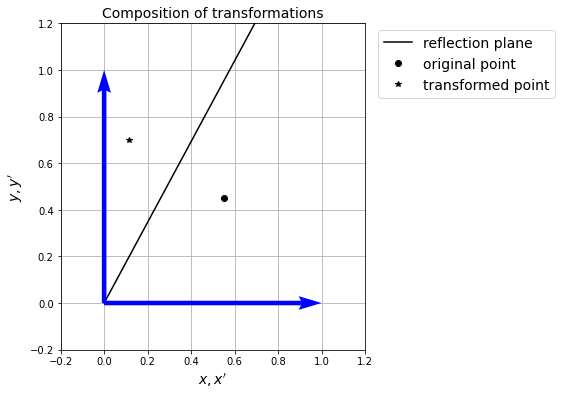

In [5]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Composition of transformations', fontsize=14)
ax1.grid(True)

# original basis vectors
i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)

# transform matrix for coordinates
theta = -30 *np.pi/180 
Ab = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

# plot a line to indicate what we are reflecting the point across
ax1.plot([0,3*np.cos(60*np.pi/180)],[0,3*np.sin(60*np.pi/180)],'k', label='reflection plane')

# transformation matrix
A = np.array([[-1, 0],[0, 1]])

# add a point
p = 0.55*i + 0.45*j

# plot it
ax1.plot(p[0], p[1], 'ko', label='original point')

# update the point and plot it in terms of the original basis vectors
q = Ab@A@sl.inv(Ab) @ p

# plot it
ax1.plot(q[0], q[1], 'k*', label='transformed point')

ax1.legend(fontsize=14, bbox_to_anchor=(1.02,1), loc="upper left")

ax1.set_xlim(-.2,1.2)
ax1.set_ylim(-.2,1.2)

<div class="advanced">

Success!

Let's print out that actual transformation matrix that takes us from the circular dot to the star in terms of the original basis vectors. The point here is that we have something that we wouldn't have been able to write down easily, but it's formed from the product of three matrices that we could easily write down.
    
</div>

In [6]:
print(Ab@A@sl.inv(Ab))

[[-0.5       0.866025]
 [ 0.866025  0.5     ]]


<div class="advanced">
    
Now suppose we wanted to *additionally* move the point in the direction of the line of reflection following a reflection, this is easy to do by combining (through matrix multiplication) simple transformations performed in the new basis.
    
</div>

[[-0.325     1.169134]
 [ 1.169134  1.025   ]]


(-0.200000, 1.200000)

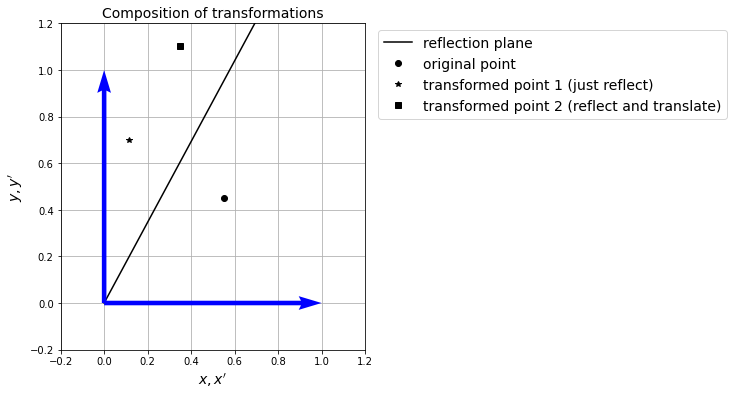

In [7]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Composition of transformations', fontsize=14)
ax1.grid(True)

# original basis vectors
i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10, width=0.015)

# transform matrix for coordinates
theta = -30 *np.pi/180 
Ab = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

# plot a line to indicate what we are reflecting the point across
ax1.plot([0,3*np.cos(60*np.pi/180)],[0,3*np.sin(60*np.pi/180)],'k', label='reflection plane')

# transformation matrix 1 - this reflects the first component
A1 = np.array([[-1,0],[0,1]])


# additional linear transformation matrix - this scales the second component
A2 = np.array([[1, 0],[0, 1.7]])


# add a point
p = 0.55*i + 0.45*j

# plot it
ax1.plot(p[0],p[1],'ko', label='original point')

# update the point and plot it in terms of the original basis vectors
# this is just the relfection
q = Ab@A1@sl.inv(Ab) @p

# plot it
ax1.plot(q[0],q[1],'k*', label='transformed point 1 (just reflect)')

# this is just the relfection followed by the translation along the direction given by the reflection plane
q = Ab@A2@A1@sl.inv(Ab) @p
print(Ab@A2@A1@sl.inv(Ab))
# plot it
ax1.plot(q[0],q[1],'ks', label='transformed point 2 (reflect and translate)')

ax1.legend(fontsize=14, bbox_to_anchor=(1.02,1), loc="upper left")

ax1.set_xlim(-.2,1.2)
ax1.set_ylim(-.2,1.2)

<div class="advanced">
    
In the above the additional movement was via a *scaling* (by a factor 1.7) of *one* of the transformed coordinates. 
   
</div>

## Transformation of a unit sphere

We can also consider how all vectors (points) of a fixed unit magnitude transform by considering how a unit circle transforms under multiplication by an arbitrary matrix $A$.

Imagine the circle made up of a collection of points, each representing the vector from the origin. If we transform each of these points and maintain their ordering (i.e. maintain the lines joining them which approximate a continuous circle), what shape do we arrive at? 

This is an extension of the transformed square examples from last lecture of course.

In 3D we can of course think about a unit sphere, and so on to even higher dimensions.

These concepts of thinking about matrices in terms of transformations can also be applied to non-square matrices.

(-2.4417681887890703,
 2.442280539208872,
 -3.3253700137371256,
 3.324817894974686)

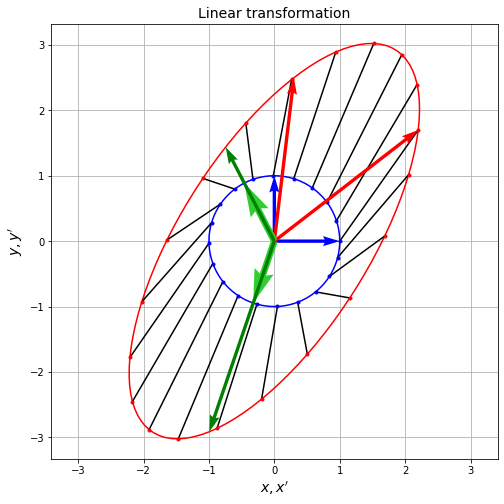

In [8]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# choose a random transformation matrix
A = np.array([[2.2,0.3],[1.7,2.5]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    #ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')
    ax1.plot([points[0,5*i]],[points[1,5*i]],'b.')
    ax1.plot([pointsp[0,5*i]],[pointsp[1,5*i]],'r.')

# compute and plot some special directions!
lam, vecs = sl.eig(A)

# plot the unit eigenvectors
ax1.quiver(vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)
ax1.quiver(vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)

# plot the scaled eigenvectors
ax1.quiver(np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)
ax1.quiver(np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)

ax1.axis('equal')

The blue arrows are the original basis vectors, the red are what they transform to (the colums of $A$ here) - we've seen this sort of thing already. 


The blue dots show a subset of the points (at a finite resolution - `theta[::5]` in the code above "prunes" the number of points), showing how unit vectors or points on the initial unit circe map (in blue) map to new locations indicated by the red dots with black likes in between clarifying the correspondence.

Note how  the new locations/vectors now map out a (non-unit) ellipse (some stretching and rotation has gone on).

I have also added some *special* vectors/directions here - notice that the green arrows do not change their orientation, only their magnitude!

These are special directions we will talk above shortly.

But first ...

## A symmetric positive definite case

Let's try a case where the matrix is so-called *symmetric-positive-definite* (which we will define later in this lecture).

(-4.33336363843506, 4.332091732203538, -3.935385214930017, 3.9339830396970585)

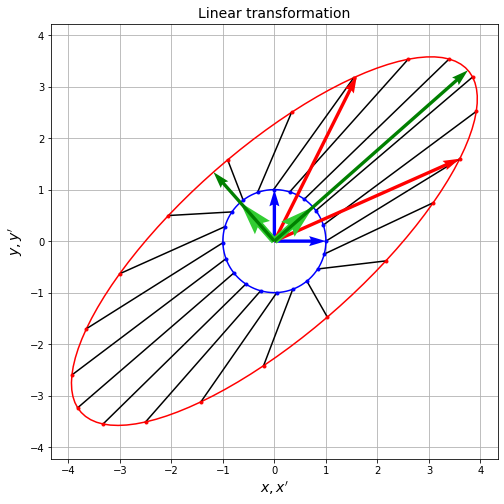

In [9]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])


# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# an SPD example matrix
A = 2*np.array([[1.8,0.8],[0.8,1.6]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    #ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')
    ax1.plot([points[0,5*i]],[points[1,5*i]],'b.')
    ax1.plot([pointsp[0,5*i]],[pointsp[1,5*i]],'r.')

# compute and plot some special directions!
lam, vecs = sl.eig(A)

# plot the unit eigenvectors
ax1.quiver(vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)
ax1.quiver(vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)

# plot the scaled eigenvectors
ax1.quiver(np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)
ax1.quiver(np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)

ax1.axis('equal')

In this case notice that the *special* directions correspond with the [semi-major and semi-minor axes](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) of the ellipse.

But what are these special directions - that are purely scaled (direction is unchanged) when pre-multiplying by this matrix?


<br>

.... next section!

# Eigenvalues and eigenvectors

In the previous lecture we were largely motivated by the solution of linear systems.

Another common task is finding the eigenvalues and eigenvectors for a given square $n\times n$ matrix $A$. (We will see some reasons why a bit later).

That is, find scalars $\lambda$ and corresponding non-zero vectors $\boldsymbol{v}$ such that

$$ A \boldsymbol{v} = \lambda \boldsymbol{v} $$

What is this achieving? 


- Mathematically: we can think of this as finding the directions $\boldsymbol{v}$ in $n$-dimensional space, where the action of $A$ applied to that direction is simply to scale it - the direction being unchanged.


- Geometrically: we saw examples of these vectors/directions in the two examples above.

## How to find eigenvalues and eigenvectors

Suppose we want to find the eigenvalues and eigenvectors of

$$ A = 
\left(
  \begin{array}{rr}
    3 & 1 \\
    1 & 3  
  \end{array}
\right)
$$

Well starting from 

\begin{align*}
A \boldsymbol{v} &= \lambda \boldsymbol{v}\\
\iff A \boldsymbol{v} - \lambda \boldsymbol{v} &= 0\\
\iff (A - \lambda I) \boldsymbol{v} &= 0
\end{align*}

If the matrix $A-\lambda I$ is invertible then the solution to this equation is clearly only $\boldsymbol{v}=\boldsymbol{0}$. 

We do *not* want this trivial solution.

We are looking for non-trivial solutions to this problem and so we want to find the $\lambda$ values that mean that
$A-\lambda I$ is *not* invertible.

Note that this only makes sense when $A$ is a square matrix. 

[For non-square matrices we can generalise this concept by introducing [*singular values*](https://en.wikipedia.org/wiki/Singular_value_decomposition) which will be touched upon briefly in the next lecture and comes up more in later modules on Inversion and Optimisation, and Machine Learning.].

# The determinant again, and its use in finding eigenvalues

So for both linear systems (last lecture) and eigenvalues/vectors, we need a method to determine whether a given matrix is invertible or not - the determinant of the matrix tells us this as we covered in detail in the last lecture.

## An example eigenvalue problem

Consider again the eigenvalue problem for the matrix 

$$ A = 
\left(
  \begin{array}{rr}
    3 & 1 \\
    1 & 3  
  \end{array}
\right)
$$


As stated above, we are looking for non-trivial solutions to this problem and so we want to find the $\lambda$ values that mean that $A-\lambda I$ is *not* invertible, 

i.e. has zero determinant.

So we need to solve the equation

$$ \det (A - \lambda I) = 0$$

this boils down to a polynomial equation for which we want to find its [roots](http://mathworld.wolfram.com/PolynomialRoots.html) $\lambda$:

$$ 0 =  \det (A - \lambda I) = 
\left|
  \begin{array}{rr}
    3-\lambda & 1 \\
    1 & 3-\lambda  
  \end{array}
\right|
= (3-\lambda)^2 - 1 = \lambda^2 - 6\lambda + 8 = (\lambda-4)(\lambda-2)
$$

so the eigenvalues are

$$\lambda_1 = 4\quad\text{and}\quad \lambda_2 = 2$$

Note to do the final step I could see how to [factor](https://en.wikipedia.org/wiki/Factorization) the quadratic expression to find the roots, alternatively you could have used the formula for the roots of a quadratic (in this $2\times 2$ case).

Note that the polynomial $\det (A - \lambda I)$ is termed the [*characteristic polynomial*](https://en.wikipedia.org/wiki/Characteristic_polynomial) of $A$ - the eigenvalues are the roots of the characteristic polynomial.

You should be able to see that for an $n\times n$ matrix the characteristic polynomial will be of degree $n$ and hence we will be able to find $n$ roots (eigenvalues), but even if $A$ is a real matrix some of these eigenvalues may be complex (they will appear as complex conjugate pairs), and some may be repeated.

We can check our result against a SciPy function (`sl.eigvals`, see also `sl.eig`) to return the eigenvalues:

In [10]:
A = np.array([[3,1],[1,3]])
print("e'vals: ", sl.eigvals( A ))
# and if we know that the eigenvalues are real we can extract the real part:
print("Real(e'vals): ", np.real(sl.eigvals( A )))

e'vals:  [4.+0.j 2.+0.j]
Real(e'vals):  [4. 2.]


As we've found roots of a quadratic polynomial note that it's returned a complex number, in this case with the imaginary component being zero. 

We can therefore safely take only the real component and see that this agrees with our calculation.

Now let's find the eigenvectors.

Consider the first eigenvalue $\lambda_1 = 4$.

We want to find the vector $\boldsymbol{v}$ such that

$$A \boldsymbol{v} = \lambda \boldsymbol{v} \iff (A-\lambda I) \boldsymbol{v} =\boldsymbol{0}$$

which for our current example reads

$$
\left(
  \begin{array}{rr}
    3 & 1 \\
    1 & 3  
  \end{array}
\right)
\left(
  \begin{array}{r}
    v_1 \\
    v_2  
  \end{array}
\right)
  = 4
  \left(
  \begin{array}{r}
    v_1 \\
    v_2  
  \end{array}
\right)
$$

or 

$$
\left(
  \begin{array}{rr}
    -1 & 1 \\
    1 & -1  
  \end{array}
\right)
\left(
  \begin{array}{r}
    v_1 \\
    v_2  
  \end{array}
\right)
  = 
  \left(
  \begin{array}{r}
    0 \\
    0  
  \end{array}
\right)
$$

This clearly has the solution $v_1=v_2$ and emphasises the point that eigenvectors corresponding to a single eigenvalue are not unique - you can always multiply they by a constant (so their direction doesn't change, just their magnitude). 

It's common to fix the arbitrariness by normalising them, i.e. asking that 

$$\|\boldsymbol{v} \| = \sqrt{v_1^2+v_2^2} = 1$$

in which case we can say that $\boldsymbol{v}$ is a *unit vector*.

(NB. we will firm up our understanding of norms $\|\cdot\|$ a little later.)

Since we established that $v_1=v_2$, these two equations allows us to conclude that

$$\boldsymbol{v}_1 =   
\left(
  \begin{array}{r}
    \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}}  
  \end{array}
\right)
$$

As an exercise you can work out that second eigenvector - what relationship does it have with the first?

In [11]:
A = np.array([[3., 1.], [1.,3.]])
lam1 = 4
v1 = np.array([1./np.sqrt(2), 1./np.sqrt(2)])

print('v1 =', v1, '\n')

v2 = np.array([-v1[1], v1[0]])

print('v2 =', v2, '\n')

print(np.dot(v1,v2))

print(v1.dot(v2))

print(v1.dot(v1))
print(v2.dot(v2))

v1 = [0.707107 0.707107] 

v2 = [-0.707107  0.707107] 

0.0
0.0
0.9999999999999998
0.9999999999999998


And we can check the eigenvalues and eigenvectors we have calculated against SciPy (this time using `sl.eig` which returns the eigenvalues and the eigenvectors):

In [12]:
A = np.array([[3,1],[1,3]])
evals, evecs = sl.eig( A )
print(evals)
print(evecs)
print(evecs[:,0])
print(evecs[:,1])

[4.+0.j 2.+0.j]
[[ 0.707107 -0.707107]
 [ 0.707107  0.707107]]
[0.707107 0.707107]
[-0.707107  0.707107]


Let's verify by substituting what we've worked our back into the expression 

$$ A \boldsymbol{v} = \lambda \boldsymbol{v} $$

that our eigenvalues and eigenvectors are correct:

In [13]:
A = np.array([[3., 1.], [1.,3.]])

lam1 = 4
v1 = np.array([1./np.sqrt(2), 1./np.sqrt(2)])

print('A = \n', A, '\n')
print('v1 =', v1, '\n')
print('A@v1 = \n', A@v1, '\n')

# we can check if our result is (approximately) correct with
print('A @ v1 = lam1 * v1:  ', np.allclose(A@v1 , lam1*v1))

A = 
 [[3. 1.]
 [1. 3.]] 

v1 = [0.707107 0.707107] 

A@v1 = 
 [2.828427 2.828427] 

A @ v1 = lam1 * v1:   True


For symmetric matrices (as is the case here) it can be shown that the eigenvectors will be *orthogonal* to one another (and as a consequence linearly independent/unique - this is not necessarily true for non-symmetric matrices as we will see below).

As above we can scale them to be unit vectors (normalised).

If both are satisfied (orthogonal to one another, and all normalised) we say that the eigenvectors are [*orthonormal*](https://en.wikipedia.org/wiki/Orthonormality).

We can verify that they are of unit length by computing the Euclidean norm, or equivalently via the [dot product](https://en.wikipedia.org/wiki/Dot_product) of the vector with itself:

$$\|\boldsymbol{v}\|_2 = \sqrt{v_1^2 + v_2^2} = \sqrt{\boldsymbol{v} \cdot \boldsymbol{v}} = \sqrt{\boldsymbol{v}^T\boldsymbol{v}}$$

and so $||\boldsymbol{v}||_2 = 1 \iff \boldsymbol{v} \cdot \boldsymbol{v}=1 $, (in which case we call them unit vectors, or normalised vectors)


and they are orthogonal to one another via: 

$$\boldsymbol{v}_1 \cdot \boldsymbol{v}_2=0$$

Let's check these in a few different ways:

In [14]:
v1 = evecs[:,0]
v2 = evecs[:,1]
# check the dot product of vectors with themselves, in various ways!
print(v1.dot(v1))
print(v2.dot(v2))
print(np.dot(v1,v1))
print(v2.T@v2)
print(sl.norm(v2,2))

print('\n',v1.dot(v2))

0.9999999999999998
0.9999999999999998
0.9999999999999998
0.9999999999999998
1.0

 0.0


## What does linear (in)dependence mean?

We covered this last lecture in the context of the solvability of linear systems. 

As a reminder (this time describing it in a more formal mathematical way compared to the previous lecture):

we say that a set of vectors $V:=\{\boldsymbol{v}_i\}$ are linearly independent if for all $(\forall)$ $\boldsymbol{v}_j \in V$ we *cannot* write it as a linear combination of the *other* vectors in $V$, 

i.e. we *cannot* find scalars $\alpha_i$ such that 

$$ \boldsymbol{v}_j = \sum_{i=1,i\neq j}^n \alpha_i \boldsymbol{v}_i$$

Equivalently, the vectors are linearly independent (*l.i.*) if the equation

$$\sum_{i=1}^n \alpha_i \boldsymbol{v}_i = \boldsymbol{0}$$

has *only the trivial solution*: $\alpha_i = 0$, $\forall i$.

Or the way we explained it in the previous lecture: $n$ vectors are *l.i.* if they span $n$-dimensional space - we can use a weighted sum of them to reach *any* point in that space.

## Repeated eigenvalues - algebraic & geometric multiplicity

Sometimes we will find the same eigenvalue repeated, for example:

In [15]:
A = np.array([[1,0],[0,1]])
evals, evecs = sl.eig( A )
print(evals)
print(evecs)
print(evecs[:,0].dot(evecs[:,0]))
print(evecs[:,1].dot(evecs[:,1]))
print(evecs[:,0].dot(evecs[:,1]))

[1.+0.j 1.+0.j]
[[1. 0.]
 [0. 1.]]
1.0
1.0
0.0


As $\lambda = 1$ appears twice we say it is an eigenvalue of **algebraic multiplicity** 2.

In this case we *are able* to find two orthogonal eigenvectors (as for this case the matrix is again symmetric) that correspond to this eigenvalue.

Since they are orthogonal they span a 2D space (called the **eigenspace**), and we say that the eigenvalue has **geometric multiplicity** 2 (the dimension of the corresponding eigenspace - which is the dimension of the nullspace of $A-\lambda I$ of course).

Let's consider another case:

In [16]:
A = np.array([[1,1],[0,1]])
evals, evecs = sl.eig( A )
print(evals)
print(evecs)
print(evecs[:,0].dot(evecs[:,0]))
print(evecs[:,1].dot(evecs[:,1]))
print(evecs[:,0].dot(evecs[:,1]))

[1.+0.j 1.+0.j]
[[ 1.000000e+00 -1.000000e+00]
 [ 0.000000e+00  2.220446e-16]]
1.0
1.0
-1.0


In this case we do NOT have two linearly independent vectors - the eigenspace is only 1D.

Thus for this case while the eigenvalue's *algebraic multiplicity* is again 2,  the *geometric multiplicity* is only 1 - these two vectors only span a 1D space.

(So if you think about it the names *algebraic* and *geometric* multiplicity make perfect sense!)

## Some useful theoretical results about eigenvalues/vectors

We won't prove any of the following, but you could check by trying a few examples that the following appear to hold.



1. The eigenvalues of symmetric real matrices are *always real*.



2. Eigenvectors corresponding to distinct eigenvalues are always *linearly independent*. (For repeated eigenvalues we **may be able** to find the corresponding number of linearly independent eigenvectors).



3. The eigenvectors of a symmetric real matrix, corresponding to *distinct* eigenvalues, are mutually *orthogonal*.



4. A consequence of this is that, if a symmetric real matrix has all distinct eigenvalues, then 
    - the matrix of normalised (i.e. of unit length) eigenvectors is orthogonal: $P^TP = I$. (If we don't bother to normalise them first then $P^TP$ would instead be diagonal).
    - the normalised vectors form an *orthonormal basis* for $n$-dimensional Euclidean space.

<div class="optional">
    
## Symmetric Positive-Definite (SPD) matrices [*]

[Symmetric positive-definite](https://en.wikipedia.org/wiki/Definiteness_of_a_matrix) matrices appear all over the place, in physics as well as the result of numerical discretisation.

A symmetric matrix $A$ is said to be positive-definite if 

$$\boldsymbol{x}^T A \boldsymbol{x} >0 \qquad \forall \boldsymbol{x}\ne \boldsymbol{0} $$

One can show that a symmetric matrix is positive definite as well if and only if all of its eigenvalues are strictly positive.

Similar definitions exist for semi-definite, negative-definite etc.

Some properties of matrices such as these can be found here:
<https://en.wikipedia.org/wiki/Definiteness_of_a_matrix#Properties>


<br>

<br>

Recall the plot of a circle being transformed into an ellipse above - the case of a SPD matrix corresponded to the eigenvectors being aligned with the major and minor axes of the ellipse.

<br>

<br>

### Diagonal dominance

Other than checking that all eigenvalues are positive, another check that is useful for matrices we often see in practice is to check that the diagonal entries are positive, and that their entries make them [*strictly diagonally dominant*](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix):

$$ |A_{ii}| >  \sum_{\substack{j=1\\ j\ne i}}^n \, |A_{ij}|, \;\;\;\;  i=1,2,\ldots, n.$$

</div>

# Matrix diagonalisation

A further consequence/related concept is that a square $n \times n$ matrix $A$ with $n$ **distinct** eigenvalues is diagonalisable.

This means that we can find a matrix $P$ such that we decompose or factorize the matrix in the following way

$$A = P\Lambda P^{-1}$$

where $\Lambda$ is a diagonal matrix. 

Said another way, there exists a transformation matrix $P$ such that

$$P^{-1}AP\quad\text{is a diagonal matrix}$$

<br>

Note that the converse is not true - a matrix **may be** diagonalisable even if it does not have distinct eigenvalues, i.e. has repeated eigenvalues.

## Symmetric real matrices

In the special case of a symmetric real matrix, it can ***always*** *be diagonalised* using an [orthogonal matrix](https://en.wikipedia.org/wiki/Orthogonal_matrix):

$$A = Q\Lambda Q^T \quad \iff \quad \Lambda = Q^T A Q$$

A consequence is that any $n\times n$ real symmetric matrix must possess $n$ mutually orthogonal eigenvectors, even if it has repeated eigenvalues (so we actually have a stronger result than 4 above).

[Aside: The slight contradiction in this phrasing you may spot here is due to the fact that the eigenvectors corresponding to repeated eigenvalues, while chosen to be l.i. in order to span the corresponding eigenspace, won't be automatically orthogonal. However, we can construct or choose orthogonal eigenvectors - the [Gram-Schmidt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) is a method that can be used to achive this].

## When is a matrix diagonalisable

An $n \times n$ matrix $A$ is diagonalisable if and only if for all eigenvalues the algebraic and geometric multiplicities are equal, equivalently the sum of the geometric multiplicities is $n$ - we'll see why in the next cell. 

This just means we need to be able to find $n$ linearly independent eigenvectors (even if some of the eigenvalues are repeated).

For more details see <https://en.wikipedia.org/wiki/Diagonalizable_matrix>.

What if we can't find $n$ l.i. eigenvectors? Then the [Jordan normal form](https://en.wikipedia.org/wiki/Jordan_normal_form)  is the best we can do, which is still useful for certain tasks.

## The details

Why do we need linearly independent eigenvectors?

Consider an $n\times n$ matrix $A$ with eigenvalues $\boldsymbol{v}_i$ and corresponding eigenvalues $\lambda_i$, $i=1,\ldots, n$.

Define $P$ to be the matrix of eigenvectors making up its columns:

$$P = \left[ \; \boldsymbol{v}_1 \;\;  \boldsymbol{v}_2  \; \; \cdots \; \;  \boldsymbol{v}_n \; \right]$$

and $\Lambda$ the diagonal matrix of eigenvectors:

$$\Lambda = \begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots & 0 & \lambda_n
\end{pmatrix}$$

Then based on what we've seen about matrix-vector multiplication several times already, i.e. it acts on the columns independently, we have

\begin{align*}
AP & = A \left[ \; \boldsymbol{v}_1 \;\;  \boldsymbol{v}_2  \; \; \cdots \; \;  \boldsymbol{v}_n \; \right] \\[5pt]
& = \left[ \;  \lambda_1\boldsymbol{v}_1 \;\;   \lambda_2\boldsymbol{v}_2  \; \; \cdots \; \;  \lambda_n\boldsymbol{v}_n \; \right] \\[15pt]
& = \left[ \; \boldsymbol{v}_1 \;\;  \boldsymbol{v}_2  \; \; \cdots \; \;  \boldsymbol{v}_n \; \right]
\begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots & 0 & \lambda_n
\end{pmatrix}\\[15pt]
& = P
\begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots & 0 & \lambda_n
\end{pmatrix}
\end{align*}

<br>

This is good, but to finish things and to obtain the diagonalisation we are reliant on $P$ being invertible. 

$P$ is the matrix of eigenvectors. 

$P$ is therefore invertible (and we thus have a diagonalisation of the matrix) if and only if the eigenvectors are linearly independent. This is one of the equivalent properties of a matrix being invertible that we saw earlier.

In which case we post-multiply both sides by $P^{-1}$:

\begin{align*}
AP = P \Lambda \implies A = P \Lambda P^{-1}
\end{align*}

## An example

Let's consider the problem from above, use the eigenvalues and eigenvectors we found to construct $P$ and $\Lambda$ and check that their combination is indeed equal to $A$:

In [17]:
A = np.array([[3., 1.], [1.,3.]])
lam1 = 4
# use the non-dimensionalised, i.e. unit length e-vecs
v1 = np.array([1./np.sqrt(2), 1./np.sqrt(2)])
lam2 = 2
v2 = np.array([-v1[1],v1[0]])

# force v1 and v2 to be column vecs
v1.shape = (2,1)
v2.shape = (2,1)

# and stack them into the matrix P
P = np.hstack((v1,v2))
# and form the diagonal matrix with e'vals on the main diagonal
Lambda = np.diag(np.array([lam1,lam2]))

# we can check if our result is (approximately - read the docs) correct with
print('A = P \Lambda P^{-1}:  ', np.allclose(A , P@Lambda@(sl.inv(P))))
print('A = P \Lambda P^T:  ', np.allclose(A , P@Lambda@((P.T))))

A = P \Lambda P^{-1}:   True
A = P \Lambda P^T:   True


Now let's check how we can form the diagonalisation using the outputs from `sl.eig`.

In [18]:
lam, vecs = sl.eig(A)
print(lam)
print(vecs)
print('The P we constructed is the same matrix you get from sl.eig:', np.allclose(P , vecs))
print('The diagonal Lambda matrix we constructed is the same matrix you get from sl.eig:', np.allclose(Lambda , lam))
print(' Our Lambda matrix = \n ',Lambda)
print('sl.eig returns for eigenvalues: ',lam)
# ah we forgot that eig returns complex numbers even when real, so instead let's check
print('The diagonal Lambda matrix we constructed is the same matrix you get via np.diag(np.real(lam)):', 
      np.allclose(Lambda , np.diag(np.real(lam))))
# and therefore now
print('A =  vecs@np.diag(np.real(lam))@sl.inv(vecs)) :', np.allclose(A, vecs@np.diag(np.real(lam))@sl.inv(vecs)))

[4.+0.j 2.+0.j]
[[ 0.707107 -0.707107]
 [ 0.707107  0.707107]]
The P we constructed is the same matrix you get from sl.eig: True
The diagonal Lambda matrix we constructed is the same matrix you get from sl.eig: False
 Our Lambda matrix = 
  [[4 0]
 [0 2]]
sl.eig returns for eigenvalues:  [4.+0.j 2.+0.j]
The diagonal Lambda matrix we constructed is the same matrix you get via np.diag(np.real(lam)): True
A =  vecs@np.diag(np.real(lam))@sl.inv(vecs)) : True


<div class="optional">

## A geometrical interpretation of matrix multiplication using matrix diagonalisation

Recall the example from above for how multiplication by a matrix transformed the unit circle

</div>

lam =  [1.620274+0.j 3.079726+0.j]
vecs =  [[-0.459594 -0.322764]
 [ 0.888129 -0.946479]]


(-2.4417681887890703,
 2.442280539208872,
 -3.3253700137371256,
 3.324817894974686)

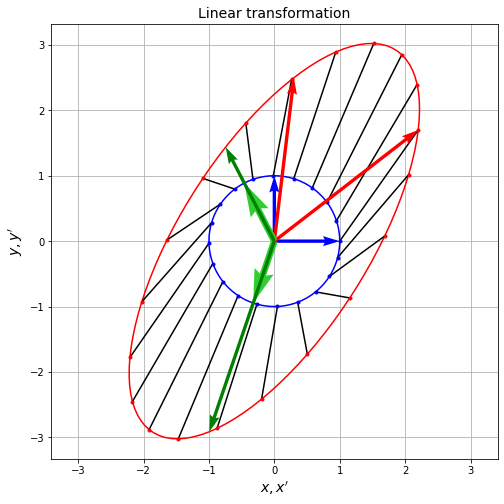

In [19]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# choose a random transformation matrix
A = np.array([[2.2,0.3],[1.7,2.5]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    #ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')
    ax1.plot([points[0,5*i]],[points[1,5*i]],'b.')
    ax1.plot([pointsp[0,5*i]],[pointsp[1,5*i]],'r.')

# compute and plot some special directions!
lam, vecs = sl.eig(A)

print('lam = ', lam)
print('vecs = ', vecs)

# plot the unit eigenvectors
ax1.quiver(vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)
ax1.quiver(vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)

# plot the scaled eigenvectors
ax1.quiver(np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)
ax1.quiver(np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)

ax1.axis('equal')

<div class="optional">

The blue arrows are the original basis vectors, the red are what they transform to (the colums of $A$ here) - we've seen this sort of thing already. 


The blue dots show a subset of the points (at a finite resolution - `theta[::5]` in the code above "prunes" the number of points), showing how unit vectors or points on the initial unit circe map (in blue) map to new locations indicated by the red dots with black likes in between clarifying the correspondence.

Note how  the new locations/vectors now map out a (non-unit) ellipse (some stretching and rotation has gone on).

The green arrow indicate the *special* vectors/directions that do not change their orientation, only their magnitude. These are clearly the eigenvectors.

<br>

Let's use matrix diagonalisation to break up this single transformation into three:

</div>

<div class="optional">
    
By noting that 

\begin{align*}
A = P \Lambda P^{-1} 
\end{align*}

where 

$$P = \left[ \; \boldsymbol{v}_1 \;\;  \boldsymbol{v}_2  \; \; \cdots \; \;  \boldsymbol{v}_n \; \right]$$

and 

$$\Lambda = \begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots & 0 & \lambda_n
\end{pmatrix}$$

let's break down the single matrix multiplication $A\boldsymbol{x}$ which performed the above transformation of the unit circle into three multiplications taken in turn:

<br>

\begin{align*}
A\boldsymbol{x} = P \Lambda P^{-1}\boldsymbol{x} = P \; (\Lambda\;  (P^{-1}\boldsymbol{x}))
\end{align*}

</div>

In [21]:
A = np.array([[2.2,0.3],[1.7,2.5]])

# it's eigenvalues and eigenvectors - printed out above - you can check yourself
lam1 = 3.079726
v1 = np.array([0.322764, 0.946479])
lam2 = 1.620274
v2 = np.array([-0.459594,0.888129])

# normalise the eigenvectors
v1 = v1/np.sqrt(np.dot(v1,v1))
v2 = v2/np.sqrt(np.dot(v2,v2))
               
# in order to form the matrix P, first force v1 and v2 to be column vecs
v1.shape = (2,1)
v2.shape = (2,1)

# and stack them into the matrix P using hstack
P = np.hstack((v1,v2))
# and form the diagonal matrix with e'vals on the main diagonal
Lambda = np.diag(np.array([lam1,lam2]))

# confirm our diagonalisation works
print('A =  P@Lambda@sl.inv(P) :', np.allclose(A, P@Lambda@sl.inv(P)))
print(P)
print(Lambda)
print(sl.inv(P))

A =  P@Lambda@sl.inv(P) : True
[[ 0.322764 -0.459594]
 [ 0.946479  0.888129]]
[[3.079726 0.      ]
 [0.       1.620274]]
[[ 1.230688  0.636863]
 [-1.311544  0.447257]]


<div class="optional">

First let's plot what the first multiplication

$$P^{-1}\boldsymbol{x}$$

does to the unit circle:

</div>

(-1.5242459383299214,
 1.5236159646389358,
 -1.5241716469722837,
 1.5239715465055717)

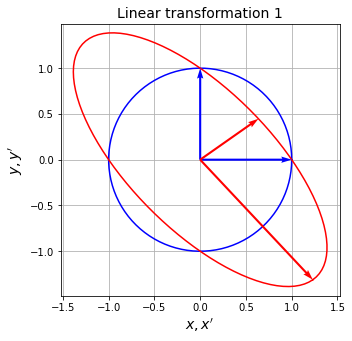

In [22]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation 1', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# Use our P^{-1} matrix

xp = sl.inv(P)@x
yp = sl.inv(P)@y
pointsp = sl.inv(P)@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

<div class="optional">

From above $P^{-1}$ is

$$\begin{pmatrix} 
1.230688 & 0.636863 \\
-1.311544 & 0.447257
\end{pmatrix}$$

and so $(1,0)$ transform to $(1.230688,-1.311544)$ and similarly for the second unit vector transforming to the second column of $P^{-1}$.

Note that in the special case of a symmetric matrix $A$, $P$ is orthogonal and so this process we are mid way through here has a simpler interpretation - the $P$ and $P^{-1}$ matrices just perform rotations.

<br>

Now let's pre-multiply by $\Lambda$:

</div>

(-4.6942598466690555,
 4.692319700313611,
 -2.4695756911263698,
 2.4692514735427684)

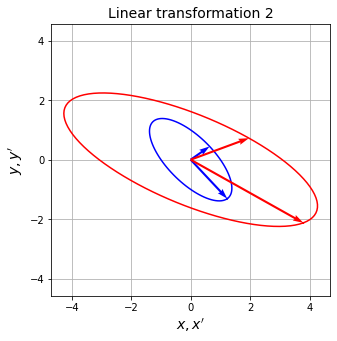

In [23]:
# before running this cell please make sure you run the previous

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# Use the points and the x,y from the previous cell:
x = xp
y = yp
points = pointsp

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation 2', fontsize=14)
ax1.grid(True)

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# Now use our Lambda matrix

xp = Lambda@x
yp = Lambda@y
pointsp = Lambda@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

<div class="optional">

The blue here was the outcome of the first operation, the red the new result.

So pre-multiplication by the diagonal $\Lambda$ just stretches in the $x$ and $y$ directions.

<br>

Finally we need to pre-multiply by $P$:

</div>

(-4.6942598466690555,
 4.692319700313611,
 -3.325369739095369,
 3.3248176295787664)

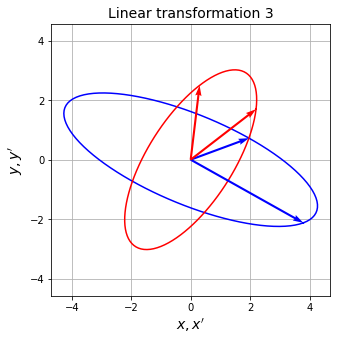

In [24]:
# before running this cell please make sure you run the previous

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# Use the points and the x,y from the previous cell:
x = xp
y = yp
points = pointsp

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation 3', fontsize=14)
ax1.grid(True)

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# Now use our P matrix

xp = P@x
yp = P@y
pointsp = P@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

<div class="optional">

Again the blue was the output from the previous operations, and red the output from the final pre-multiplication.

Note that (as long as you run the three cells in order!) the red result here agrees with the transformation under the matrix $A$ that we plotted all in one go at the start.

<br>

As already said, in the case of a ***symmetric matrix*** the $P$ and thus $P^{-1}$ being ***orthogonal matrices means that they just correspond to simple rotations***. In the case where we start from a symmetric matrix therefore the above three operations are easier to interpret - see homework for a worked example.

</div>

# Some applications of eigen-values/vectors

<div class="optional">
    
## Linear systems [\*]

Let's consider a linear system we solved in the previous lecture.

$$ A\boldsymbol{x}=\boldsymbol{b} \iff \sum_{j=1}^n a_{ij} x_j = b_i \quad\text{for}\quad i=1,\ldots, n $$

We noted that we can interpret the matrix vector multiplication as computing a weighted sum of the columns of the matrix (denoted by $\boldsymbol{a}_{\,:j}$):

$$
\begin{pmatrix}
      &     &         &     \\
      &     &         &     \\
  \boldsymbol{a}_{\,:1} & \boldsymbol{a}_{\,:2} &  \ldots & \boldsymbol{a}_{\,:n} \\
      &     &         &     \\
      &     &         &     \\
\end{pmatrix}
\begin{pmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{pmatrix}
=
x_1 
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:1} \\
       \\
    ~   
\end{pmatrix}
+
x_2 
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:2} \\
       \\
    ~   
\end{pmatrix}
+ \cdots +
x_n
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:n} \\
       \\
    ~   
\end{pmatrix}
$$

and solving the linear system can be interpreted as asking the question, given directions in an $n$-dimensional space prescribed by the column vectors of the matrix, how far do we need to move in each of these directions to reach the point $\boldsymbol{b}$.  

If the columns are linearly independent then we can reach any point, equivalently we can find a unique solution and the matrix is invertible. 

[As we saw in the previous lecture, if the columns aren't linearly independent, then we may be able to fund a (non-unique) solution if $\boldsymbol{b}$ is located in the range of the columns of $A$.]

We explained this graphically with the following image/example.
    
</div>

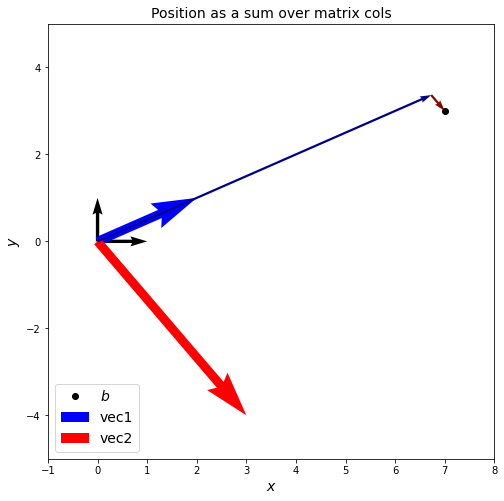

In [25]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Position as a sum over matrix cols', fontsize=14)
#ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='k')
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='k')


ax1.set_xlim(-1,8)
ax1.set_ylim(-5,5)

A = np.array([[2, 3], [1, -4]])
vec1 = A[:,0] # NB. This is the same as A*x
vec2 = A[:,1] # NB. This is the same as A*y

# plot them
ax1.quiver(vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.02,  label='vec1')
ax1.quiver(vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.02,  label='vec2')

# add point b
b = np.array([7., 3.])
ax1.plot(b[0], b[1], 'ko',  label='${b}$')

ax1.legend(loc='lower left', fontsize=14)

# Now move x_1 in the direction gioven by column one, followed by x_2 in the direction given by column 2:
x = np.array([37./11, 1./11])
ax1.quiver(x[0]*vec1[0], x[0]*vec1[1], angles='xy', scale_units='xy', scale=1, color='darkblue', width=0.005,  label='vec1')
ax1.quiver(x[0]*vec1[0], x[0]*vec1[1],x[1]*vec2[0], x[1]*vec2[1], angles='xy', 
           scale_units='xy', scale=1, color='darkred', width=0.005,  label='vec2')

<div class="optional">

### Re-interpretation in terms of eigenvalues and eigenvectors

Let's reconsider this problem in light of what we now know about matrix diagonalisation.

Assume we can diagonalise our matrix as $A=P\Lambda P^{-1}$,

well firstly note of course we can solve our problem trivially:

\begin{align*}
A\boldsymbol{x} &= \boldsymbol{b} \\
\iff P\Lambda P^{-1}\boldsymbol{x} &= \boldsymbol{b} \\
\iff \Lambda P^{-1} \boldsymbol{x} &=  P^{-1}\boldsymbol{b} \\
\iff  P^{-1} \boldsymbol{x} &= \Lambda^{-1} P^{-1}\boldsymbol{b} \\
\iff   \boldsymbol{x} &= P \Lambda^{-1} P^{-1}\boldsymbol{b}
\end{align*}

but actually let's not do this and think about things geometrically:

If we define $\boldsymbol{y}=P^{-1}\boldsymbol{x}\iff \boldsymbol{x}=P\boldsymbol{y}$ we can write

\begin{align*}
A\boldsymbol{x} &= \boldsymbol{b} \\
\iff P\Lambda P^{-1}\boldsymbol{x} &= \boldsymbol{b} \\
\iff P\Lambda  \boldsymbol{y} &= \boldsymbol{b}
\end{align*}

This is a different linear system, the RHS is unchanged (we still need to reach the same location), but the LHS matrix is different, note that it is

$$P\Lambda = \left[ \; \boldsymbol{v_1} \;\;  \boldsymbol{v_2}  \; \; \cdots \; \;  \boldsymbol{v_n} \; \right] 
\begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots & 0 & \lambda_n
\end{pmatrix}
= \left[ \; \lambda_1 \boldsymbol{v_1} \;\;  \lambda_2\boldsymbol{v_2}  \; \; \cdots \; \; \lambda_{n} \boldsymbol{v_n} \; \right]$$

So in solving for $\boldsymbol{y}$ we are asking the question how far do we need move in the directions given by the  eigenvectors (scaled by the corresponding eigenvalues) to reach location $\boldsymbol{b}$?  

Once we've achieve this we can recover the solution we want by multiplying by $P$: $\boldsymbol{x}=P\boldsymbol{y}$.

Let's check this via the example above:
    
</div>

x = Py: True


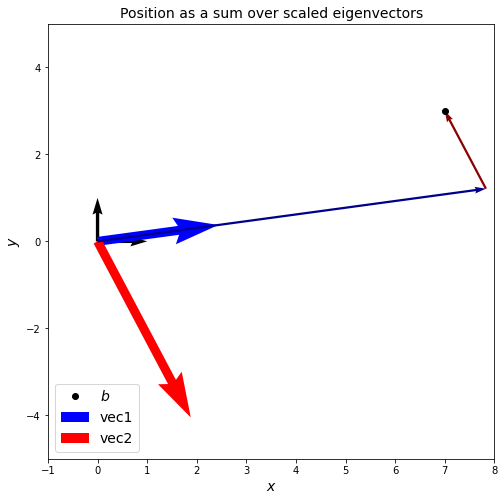

In [26]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Position as a sum over scaled eigenvectors', fontsize=14)
#ax1.grid(True)

i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='k')
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='k')

ax1.set_xlim(-1,8)
ax1.set_ylim(-5,5)

A = np.array([[2, 3], [1, -4]])

# compute the e'vals/vecs
lam, vecs = sl.eig(A)
# scaled directions
vec1 = np.real(lam)[0]*vecs[:,0] 
vec2 = np.real(lam)[1]*vecs[:,1] 

# plot them
ax1.quiver(vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.02,  label='vec1')
ax1.quiver(vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.02,  label='vec2')

# add point b
b = np.array([7., 3.])
ax1.plot(b[0], b[1], 'ko',  label='${b}$')

ax1.legend(loc='lower left', fontsize=14)

# Solve the transformed problem for y
y = sl.inv(vecs@np.diag(np.real(lam)))@b
ax1.quiver(y[0]*vec1[0], y[0]*vec1[1], angles='xy', scale_units='xy', scale=1, color='darkblue', width=0.005,  label='vec1')
ax1.quiver(y[0]*vec1[0], y[0]*vec1[1], y[1]*vec2[0], y[1]*vec2[1], angles='xy', 
           scale_units='xy', scale=1, color='darkred', width=0.005,  label='vec2')

# and confirm that x (=sl.inv(A)@b) = Py
print('x = Py:',np.allclose(sl.inv(A)@b, vecs@y))

<div class="optional">
    
The red and blue arrows this time are the eigenvectors scaled by the eigenvalues.

Note that this emphasises that if $\boldsymbol{b}$ is in the direction of an eigenvectors (or a sum of some of the eigenvectors), then the solution $\boldsymbol{y}$ will be especially simple.

Now finding the eigenvalues and eigenvectors is very difficult for large matrices, and so that above isn't actually useful in practice for solving linear systems.

However, note that the idea of solving a related linear system following a transformation, where ideally the transformed problem is easier to solve in some sense, is related to the topic of matrix [preconditioning](https://en.wikipedia.org/wiki/Preconditioner).
    
</div>

<div class="optional">

## Powers of matrices [\* - but note we are going to use this result in the next section]

An immediate application of the ability to diagonalise matrices is the following.

Consider 

$$A = 
\begin{pmatrix}
1.01 & 0.01 \\
0.01 & 1.01
\end{pmatrix}$$

Let's support our task is to raise this matrix to the power of a million, i.e. to calculate

$$A^{10000} = A \,A \,\cdots \,A$$

where each of the 10000 individual multiplications is the normal matrix-matrix multiplication. 

First let's do this by brute force and compare against NumPy.
    
</div>

In [27]:
A = np.array([[1.01, 0.01], [0.01,1.01]])

# work out the square using matrix multiplication
print(A@A)
# check this gives the same answer as matrix_power
print('\n',np.linalg.matrix_power(A,2))

# write our own function
def our_matrix_power(A,n):
    mat_power = np.eye(np.shape(A)[0])
    for i in range(n):
        mat_power = A@mat_power   # mat_power @= A not yet supported
    return mat_power

print('\n',our_matrix_power(A,10000))

print('\nOur method agrees with numpy on what A^{10000} equals: ', 
      np.allclose(our_matrix_power(A,10000), np.linalg.matrix_power(A,10000)),'\n')

time_np = %timeit -n 10 -r 3 -o AA = np.linalg.matrix_power(A,10000)
time_us = %timeit -n 10 -r 3 -o AA = our_matrix_power(A,10000)

print('\n',time_np.best, time_us.best, time_us.best/time_np.best)

[[1.0202 0.0202]
 [0.0202 1.0202]]

 [[1.0202 0.0202]
 [0.0202 1.0202]]

 [[5.019814e+85 5.019814e+85]
 [5.019814e+85 5.019814e+85]]

Our method agrees with numpy on what A^{10000} equals:  True 

23.6 µs ± 1.59 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
10.4 ms ± 148 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

 2.1491699999387493e-05 0.010325170800001615 480.42596910881315


<div class="optional">

Some comments/observations:

1. Why did I choose this matrix (with entries close to one and zero), and limit myself to a power of 10000?


2. Our naive approach is comparatively very slow, let's try using the fact that we know how to diagonalise a matrix


\begin{align*}
A &= P\Lambda P^{-1} \\
\implies A^2 & = P\Lambda P^{-1} P\Lambda P^{-1}  = P\Lambda \Lambda P^{-1} = P\Lambda^2 P^{-1} \\
& \; \vdots \\
\implies A^N & = P\Lambda P^{-1} P\Lambda^{N-1} P^{-1}= P\Lambda \Lambda^{N-1} P^{-1} = P\Lambda^N P^{-1}
\end{align*}

So to compute the $N$-th power of the original matrix we can diagonalise, raise the diagonal matrix of eigenvalues only to the power of $N$, and then reconstruct the matrix by pre- and post-multiplying by the matrix of eigenvectors and its inverse.

Efficiency savings should result since

$$\Lambda^N = 
\begin{pmatrix}
\lambda_1^N & 0 &  \cdots & 0 \\
0 & \lambda_2^N &  \ddots & 0\\
\vdots & &  \ddots & \vdots \\
0 & \cdots &  0 & \lambda_n^N
\end{pmatrix}$$

can be computed element-wise.

Let's write a new function to do this, and see if this helps with performance.
    
</div>

In [28]:
A = np.array([[1.01, 0.01], [0.01,1.01]])

def our_matrix_power2(A,n):
    mat_power = np.eye(np.shape(A)[0])
    lam, vecs = sl.eig(A)
    re_lam = np.real(lam)  # make the assumption are all e'vals are real
    re_lam_power = re_lam**n  # operate on individual entries of the vector of e'vals 
    return vecs@np.diag(re_lam_power)@sl.inv(vecs)

print('Our two methods agree what A^{10000} equals: ', 
      np.allclose(our_matrix_power(A,10000), our_matrix_power2(A,10000)),'\n')

time_np = %timeit -n 10 -r 3 -o AA = np.linalg.matrix_power(A,10000)
time_us = %timeit -n 10 -r 3 -o AA = our_matrix_power(A,10000)
time_us2 = %timeit -n 10 -r 3 -o AA = our_matrix_power2(A,10000)

print('\n',time_np.best, time_us.best, time_us2.best)

Our two methods agree what A^{10000} equals:  True 

28.3 µs ± 1.18 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
10.6 ms ± 440 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
50.5 µs ± 8.41 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

 2.7420900005381553e-05 0.010201925000001211 4.3741699983002036e-05


In [29]:
# let's try a larger problem where NumPy might not perform so well

N = 1000
A = np.eye(N) + 0.0001*np.random.random((N,N))
A = (A+A.T)/2.

n = 1000
print('Our 2nd method agrees with numpy on what A^{n} equals: ', 
      np.allclose(our_matrix_power2(A,n), np.linalg.matrix_power(A,n)),'\n')

time_np = %timeit -o AA = np.linalg.matrix_power(A,n)
#time_us = %timeit -n 10 -r 3 -o AA = our_matrix_power(A,n)
time_us2 = %timeit -o AA = our_matrix_power2(A,n)

print(time_np.best, time_us2.best, time_us2.best/time_np.best)

Our 2nd method agrees with numpy on what A^{n} equals:  True 

408 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
858 ms ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.3867373329999282 0.8043772920000265 2.079905981045217


<div class="optional">
    
So we're now down to only being a factor two slower - not bad given that we're using pure Python and NumPy will be using some compiled code to perform these basic operations: <https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms> and <https://en.wikipedia.org/wiki/LAPACK>, or <https://en.wikipedia.org/wiki/Math_Kernel_Library> on Windows.
    
</div>

<div class="optional">

### Fibonacci numbers [\*]

In the homework you're asked to find the eigenvalues and eigenvectors of the so-called Fibonacci matrix.

With this knowledge we can efficiently compute (in principle) any Fibonacci number.

We'll delay doing this until the next lecture as it offers a good learning experience for some of the ways that algorithms can go wrong!
    
</div>

## Solving a system of ODEs

### The idea/theory

Suppose we want to solve the linear problem that can be written in the form

$$\dot{\boldsymbol{x}}(t) = \frac{\boldsymbol{dx}}{dt} = \boldsymbol{x}' = A\boldsymbol{x}$$

Consistent with the scalar case, the solution to this problem is simply

$$\boldsymbol{x}(t) = \exp(tA) \boldsymbol{C}$$

where $\boldsymbol{C}$ is a constant (vector) of integration.

We can see that this is true if we know how the [matrix exponential](https://en.wikipedia.org/wiki/Matrix_exponential#Linear_differential_equation_systems) is defined:

$$\exp(tA) = I + tA + \frac{t^2}{2!}A^2 + \frac{t^3}{3!}A^3 + \cdots$$

and then note that differentiation of this w.r.t to $t$ is simply

$$\frac{d}{dt}\exp(tA) = A + tA^2 + \frac{t^2}{2!}A^3 + \cdots$$

and so indeed 

$$\frac{d}{dt}\exp(tA) = A(I + tA + \frac{t^2}{2!}A^2 + \frac{t^3}{3!}A^3 + \cdots) = A\boldsymbol{x}(t)$$


<br>
<br>

Just as above, we can compute $\exp(tA)$ in a particularly simple/efficient form if we can diagonalise it, since then as 

$$A^n = P\Lambda^n P^{-1}$$

we can see that

\begin{align*}
\exp(tA) &= 
I + t  P
\begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots &  & \ddots  & \vdots \\
0 & \cdots &  0 & \lambda_n
\end{pmatrix}
 P^{-1}\\[5pt] 
 &\qquad \qquad
+ \frac{t^2}{2!}  P
\begin{pmatrix}
\lambda_1^2 & 0 &  \cdots & 0 \\
0 & \lambda_2^2  & \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots &  0 & \lambda_n^2
\end{pmatrix}
 P^{-1} + \cdots\\[15pt]
 & = 
 P\begin{pmatrix}
e^{\lambda_1 t} & 0 &  \cdots & 0 \\
0 & e^{\lambda_2 t} &  \ddots & 0\\
\vdots & &  \ddots &  \vdots \\
0 & \cdots &  0 & e^{\lambda_n t}
\end{pmatrix}
 P^{-1}
\end{align*}

so we don't actually need to compute all of those individual matrix-matrix multiplication to form the exponential.

Now since $\exp(tA) = I$ when $t=0$, this tells us that the constant is just the initial condition: $\boldsymbol{C} = \boldsymbol{x}(t=0)$.


   
### An example

Let's consider a $2\times 2$ example where

$$\boldsymbol{x}(t) = 
\begin{pmatrix}
x_1(t)\\
x_2(t)
\end{pmatrix}$$

and 

$$A = 
\begin{pmatrix}
-1 & 3 \\
3 & -1
\end{pmatrix}
$$

A homework exercise asks you to apply the theory above to show that the solution is

\begin{align*}
\boldsymbol{x}(t) =  \exp(tA) \boldsymbol{C}
= \frac{1}{2}(C_1+C_2)
\begin{pmatrix}
1 \\
1
\end{pmatrix}\exp(2t)+
\frac{1}{2}(C_2-C_1)
\begin{pmatrix}
-1 \\
1
\end{pmatrix}\exp(-4t)
\end{align*}

and check that it agrees with a numerical calculation using forward Euler time-stepping - cf. the discussion to follow for the next problem on *stability*.

Our initial conditions can then be used to figure out what values the two constants of integration take - what choice of constants will lead to a solution that does *not* diverge to infinity?
    

<div class="optional">

### Making use of matrix diagonalisation [\*]

Instead of immediately writing down the solution to the problem

$$\dot{\boldsymbol{x}}(t) = A\boldsymbol{x}$$

as

$$x(t) = \exp(tA) \boldsymbol{C}$$

let's try a different approach (which also makes use of the matrix diagnonalisation that allowed us to compute the matrix exponential easily).

One of the reasons that this problem might be difficult to analyse/solve is that for a non-diagonal matrix $A$ the ODEs that are encoded by this system are *coupled*. This means we cannot consider then individually in isolation, and so cannot use what we know about scalar systems.

However there is a trick we can play for a linear system:

Let's introduce a new variable $\boldsymbol{z}\,$ which is related to $\boldsymbol{x}\,$ through a linear transformation: $\boldsymbol{x} = S \boldsymbol{z}$, where $S$ is a $2 \times 2$ transformation matrix.

Substituting this into our coupled ODE system yields

\begin{align*}
\frac{d\boldsymbol{x}}{dt} & = A \boldsymbol{x}\\[5pt]
\iff \frac{d (S \boldsymbol{z})}{dt} & = AS\, \boldsymbol{z}\\[5pt]
\iff S\frac{d \boldsymbol{z}}{dt} & = AS\, \boldsymbol{z}\\[5pt]
\iff \frac{d  \boldsymbol{z}}{dt} & = S^{-1}AS\, \boldsymbol{z}.
\end{align*}

Now we **want** the transformed system to be decoupled, which is equivalent to requiring that the RHS matrix multiplier $S^{-1}AS$ is actually a diagonal matrix. 

Of course we know that assuming $A$ is actually diagonalisable, then $S=P$ - the matrix of eigenvectors, and

$$S^{-1}\,A\,S = \Lambda
\;\;(\text{and so} \;\; A = S\, \Lambda\,  S^{-1})
\;\;\;\;\;\;\textrm{where}\;\;\;\;\;\;
\Lambda = \begin{bmatrix}
\lambda_1 & 0\\
0 & \lambda_2
\end{bmatrix}.$$

<br>

In this (eigen-)basis our coupled ODE system decouples into two independent first-order ODEs:

$$\frac{dz_1}{dt} = \lambda_1 z_1, \;\;\;\;\;\;\;  \frac{dz_2}{dt} = \lambda_2 z_2.$$

For our problem from the homework exercise we know that 

$$\lambda_1 = 2\quad\text{and}\quad \lambda_2 = -4
\quad\text{so}\quad
\Lambda = \begin{pmatrix}
2 & 0 \\
0 & -4
\end{pmatrix}
$$

and

$$\boldsymbol{v}_1 =   \left(
  \begin{array}{r}
    {1} \\
    {1} 
  \end{array}
\right), \qquad 
\boldsymbol{v}_2 =   \left(
  \begin{array}{r}
    {-1} \\
    {1} 
  \end{array}
\right), \qquad
S = P = 
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix}
$$

we can solve the two uncoupled ODEs easily:

$$z_1(t) = z_1(0)\exp(2t), \qquad z_2(t) = z_2(0)\exp(-4t)$$

and then convert back to our original coordinates:

\begin{align*}
\boldsymbol{x}(t) = S\boldsymbol{z}(t) & = 
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
z_1(0)\exp(2t) \\
z_2(0)\exp(-4t)
\end{pmatrix} \\[5pt]
& = z_1(0)\begin{pmatrix}
1  \\
1 
\end{pmatrix}
\exp(2t) +
z_2(0)\begin{pmatrix}
-1  \\
1 
\end{pmatrix}
\exp(-4t)
\end{align*}

i.e. the same solution as before just with the constants of integration in different notation.

This emphasises what we might have guessed from the form of the solution we derived first - the solution can be written as a sum of simple solutions in each of the individual directions described by the eigenvectors.

</div>

Please take a look at the supplementary notebook for more on this topic.

# Singular Value Decomposition (SVD)

Note that eigenvalues/vectors, and hence the eigen-decomposition of a matrix, are only defined for square matrices. 

But we can still interpret the matrix-vector multiplication

$$A\boldsymbol{x}$$

in the case of $A$ being an $m\times n$ matrix, and for a given $n\times 1$ vector $\boldsymbol{x}\;$ we map it to a new to find an $m\times 1$ vector, i.e. matrix multiplication in this non-square case maps vectors or points from $\mathbb{R}^n$ into $\mathbb{R}^m$.

<br>

<br>

The [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) generalises the eigen-decomposition concept to non-square matrices.

Consider an arbitrary $m \times n$ real matrix $A$ - very similar to the square case it can be decomposed into a product of three matrices:

$$A = U\Sigma V^{T}$$

where


- $U$ is an $m\times m$ orthogonal matrix - its columns are the eigenvectors of the matrix $AA^T$,


- $V$ is an $n\times n$ orthogonal matrix - its columns are the eigenvectors of the matrix $A^TA$,


- $\Sigma$ is an $m\times n$ diagonal matrix whose diagonal entries, $\sigma_1, \sigma_2,\ldots  $ are what are called the ***singular values*** of $A$.


<br>


<br>

The singular values of $A$ are positive, and the convention is to number them/place down the diagonal of $\Sigma$ in order of their magnitude: $\sigma_1\geq\sigma_2\geq\ldots\geq 0$.

<br>

The singular values are the square roots of the eigenvalues of the square matrix $A^TA$.  They are also the square roots of the eigenvalues of the square matrix $AA^T$.  

<br>


But hang on .....  if $A$ is non-square then $A^TA$ and $AA^T$ are of different size and thus have different numbers of eigenvalues - how to reconcile this apparent contradiction? -> The extra eigenvalues are always zero, i.e. the *maximum* number of non-zero singular values is the smaller of $m$ and $n$.

<br>


<br>

*(Figure: https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular_value_decomposition_visualisation.svg)*

<img src="./figures/Singular_value_decomposition_visualisation.svg" width=400x>


replace the star with transpose in the case of real values matrices, which we will consider here.


## Some SVD properties


- The rank of $A$ is $p$, where $p$ is the number of non-zero singular values.


 
- The first $p$ columns of $U$ form a basis for the range of $A$ (i.e. the span of the columns of $A$); the final $n-p$ columns of $V$ form a basis for the null space of $A$
 
 

- $\|A\|_2 = \sigma_1$ and $\|A\|_F = \sqrt{\sigma_1^2+\sigma_2^2+\ldots+\sigma_p^2}$.
 


- If $A = A^{T}$, then the singular values of $A$ are the absolute values of the eigenvalues of $A$ (the absolute values coming from squaring and taking the square root)


 
- The absolute value of the determinant of a square matrix $A$ is equal to the product of its singular values.



## Geometric interpretation

Above we showed that, via the eigendecomposition, we can interpret the action of matrix multiplication geometrically - by how it deforms a sphere (it turns it into a hyper-ellipse). 

In the ***square*** ***symmetric*** case the orthonormal eigenvectors describe rotations and the eigenvalues scalings.


<br>

You can think of SVD as the generalisation of this - allowing us to geometrically understand the action of matrix multiplication for a non-square matrix (and a square but non-symmetric matrix) as a series of rotations (as $U$ and $V$ are orthogonal) and scalings:



*(Figure: https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular-Value-Decomposition.svg)*

<img src="./figures/Singular-Value-Decomposition.svg" width=400x>

"... the singular values of any $m \times n$ matrix can be viewed as the magnitude of the semiaxis of an $n$-dimensional ellipsoid in $m$-dimensional space, for example as an ellipse in a (tilted) 2D plane in a 3D space. Singular values encode magnitude of the semiaxis, while singular vectors encode direction. ..."


The size and shape of $\Sigma$, and the zeros that appear in the singular values, are responsible for the embeddings that occur as we map between spaces with different dimensions.


<br>

Note that whereas the eigen-decomposition/diagonalisation of a matrix is only possible for a subset of square matrices, the SVD can be formed for **all** matrices.

<br>


An example of a $3\times 2$, i.e. mapping $\mathbb{R}^2$ into $\mathbb{R}^3$ is given in the homework.


## The compact form of SVD

If both $A^TA$ and $AA^T$ are singular, then some of the singular values will be zero.  

Let us suppose that there are $p$ non-zero singular values.  

$A$ can then also be decomposed in a more compact (or reduced) form using only the eigenvectors that correspond to non-zero values:

$$A = U_p\Sigma_p V_p^{T}$$

where


- $U_p$ is an $m\times p$ orthogonal matrix whose columns are the eigenvectors of the matrix $AA^T$,


- $V_p$ is an $n\times p$ orthogonal matrix whose columns are the eigenvectors of the matrix $A^TA$,


- $\Sigma_p$ is an $p\times p$ diagonal matrix whose diagonal entries, $\sigma_1, \sigma_2, \ldots , \sigma_p>0$  are the non-zero *singular values* of $A$

<br>

Here we just don't bother storing those entries which due to the zero singular values never contribute to the multiplication.


## Aside: some of the various uses of the SVD

1. This geometrical interpretation demonstrates how we can use the SVD to appreciate the most important direction of uncertainty/noise in observations - important in that they can have large or small impact on the model parameters we arrive at when doing inversion.  In  a very high dimensional system, if we wanted to perturb our model parameters (e.g. the initial state of the atmosphere in a weather forecast), then we can't afford to run lots of forecasts (termed an ensemble) where we fully explore the uncertainty, instead we might perturb the model parameters in the directions associated with the largest singular values.  Take a look at the homework exercise that demonstrates this by plotting scaled singular vectors.
For more on this in the context of weather forecasting see: [Singular vectors in atmospheric sciences: A review](<https://www.sciencedirect.com/science/article/pii/S0012825212000657)



2. The SVD is very important in related field, e.g. see a description here of its importance in Machine Learning and Data Science 
    * <https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491>
    * <https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca>
    * [A Tutorial on Principal Component Analysis](https://arxiv.org/pdf/1404.1100.pdf)



3. Since we can interpret an image in terms of a matrix, and a fun application of SVD is in image compression.  Notice first that expanding out the SVD:
$$A = U\Sigma V^{T} = \sigma_1 u_{:1} v_{:1}^T +  \sigma_2 u_{:s} v_{:s}^T + \ldots $$
since the $\sigma$'s are ordered in terms of their magnitudes, if we truncate this expansion early we get a so-called [low rank approximation](https://en.wikipedia.org/wiki/Low-rank_approximation) to the original matrix, or if we interpret the matrix as an image, we get different levels of compressed image! See <https://medium.com/@rameshputalapattu/jupyter-python-image-compression-and-svd-an-interactive-exploration-703c953e44f6>



# Summary
    
- In this lecture we went further in understanding matrices from a geometric perspective. 


- This led us on to eigenvalues/vectors - we considered some theory and some applications, including matrix diagonalisation and how these concepts are useful in the analysis and solution of systems of ODEs.


- We introduced the Singluar Value Decomposition as a generalisation of the eigen-decomposition of a square matrix.


- We went over some non-trivial examples, for fun and to further extend our coding experience.


- We touched on the use on (in optional cells) powerful in-built SciPy ODE solvers.